In [2]:
from IPython.display import Image

## Chapter 1: Introduction

## 1.1 Reinforcement Learning

- Reinforcement learning (RL) is learning what to do — how to map situations to actions — so as to maximize a numerical reward signal.
- RL involves **interaction** between an active decision-making **agent** and its **environment**, within which the agent seeks to acheive a **goal** despite uncertainity about its environment.
- Trial-and-error search and delayed reward are the two most important distinguishing features of RL.
- RL focuses on the exploit-explore trade-off.
- RL is formalized via dynamical systems theory. Specifically, the optimal control of incompletely-known **Markov decision processes (MDPs)**.
- RL is a third ML paradigm, distinct from supervised and unsupervised learning.
  - vs. supervised: RL can learn without labeled examples
  - vs. unsupervised: RL tries to maximize a reward signal rather than find hidden structure
- RL is part of a trend in AI towards general principles rather than specialized principles.
  - RL looks for general principles of learning, search, and decision-making, rather than "[manufacturing intelligence by] just getting enough relevant facts into a machine, say one million, or one billion".

## Example - RL vs Control:

Sutton and Barto consider RL to be an umbrella for Control. They note that Harry Klopf argued that "systems that try to maximize something (whatever that might be) are qualitatively di↵erent from equilibriumseeking systems, and he argued that maximizing systems hold the key to understanding important aspects of natural intelligence and for building artificial intelligences"

One example they give of this is:

"An adaptive controller adjusts parameters of a petroleum refinery’s operation in real time. The controller optimizes the yield/cost/quality trade-off on the basis of specified marginal costs without sticking strictly to the set points originally suggested by engineers."

*Note*: It could be fun to try and create this example in code from both an RL and Control perspective and see how they differ?

## 1.3 Elements of RL

- Elements of RL:
  - environment
  - state
  - agent
  - action policy
  - value function
  - reward signal
  - agent's environment model (optional)
- Whereas the **reward signal** indicates what is good in an immediate sense, a **value function** specifies what is good in the long run. Roughly speaking, the value of a state is the total amount of reward an agent can expect to accumulate over the future, starting from that state. 
- To what degree an agent has access to the "true value" of a state is context-dependent. The most important component of almost all RL algorithms considered in this book is a method for efficiently estimating values.

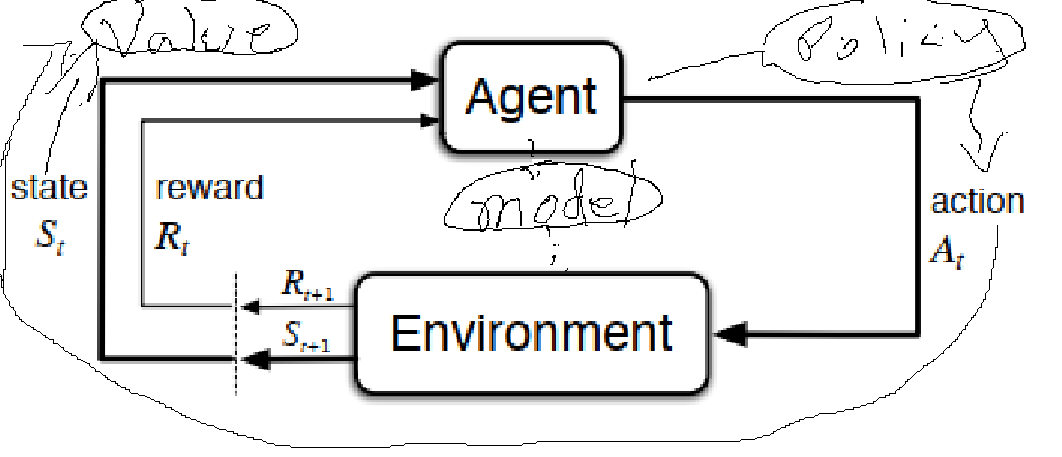

In [3]:
Image(r"images/RL_MDP_diagram.png", width=600, height=400)

## 1.4 Limitations and Scope

- This book does not address the issues of constructing, changing, or learning the state: instead, simply, the state is just thought of as whatever information is available to an agent about its environment at a given time.

- On **genetic algorithms** (not covered in this book): most RL methods considered in this book are structured around estimating value functions, but these are not strictly necessary to solve RL problems; e.g. genetic algorithms never estimate value functions. 
  - Genetic algorithms have advantages when the space of policies is small (or can be structured so that they are easy to find), and in problems when the agent cannot sense the complete state of its environment, and disadvantages in opposite cases (they can be extremely inefficient compared to robust value-estimating algorithms)

## 1.5 Extended Example: Tic-Tac-Toe

- Consider playing against a suboptimal opponent: how can we construct a player that will find the imperfections in the opponent's play?
  - Techniques we *won't* use (at least for now):
    - A **minimax** player could not find the imperfections: it would never reach a state from which it *could* lose even if it would win due to suboptimal play from that state by the opponent.
    - **Dynamic programming** could compute an optimal solution for any opponent, but only after obtaining/learning a complete spec of that opponent.
    - A **genetic algorithm** would also require many games in order to find an optimal policy.
  - Using a value function:
    - Set up a **state value table** of numbers: one for each possible state, containing the latest updated estimate of winning from that state. 
    - Set up an **action policy**, choosing which action to choose from each state, with some trade-off between moving **greedily** (**exploiting**), vs. **exploring**
    - After greedy moves, update the value of the state before that move to be closer to the value of the current state (the state after that move): 
    $$\begin{equation}
    V(S_t) \leftarrow V(S_t) + (\alpha * (V(S_{t+1}) - V(S_t)))
    \end{equation}\tag{1.0}$$
      - This is an example of **TD learning**.
    - This solution can achieve the effects of planning and look-ahead without building an explicit model of the opponent and without conducting an explicit search over possible sequences of future states and actions.
  - Additional notes on this example and RL in general:
    - Here our agent could "look-ahead" to see which move to choose (if choosing greedily), but **environment model-free** RL systems can exist, in which the value of a next state is unknown. 
    - Here our agent was **opponent model-free**, but RL agents can incorporate building models of others.
    - Here learning started with no prior knowledge, but prior information can be incorporated into an RL agent.
    - Here there was an explicit opponent, but RL works in more general cases, in "games against nature." 
    - Here the state set was small, but RL works when the state set is very large or even infinite.

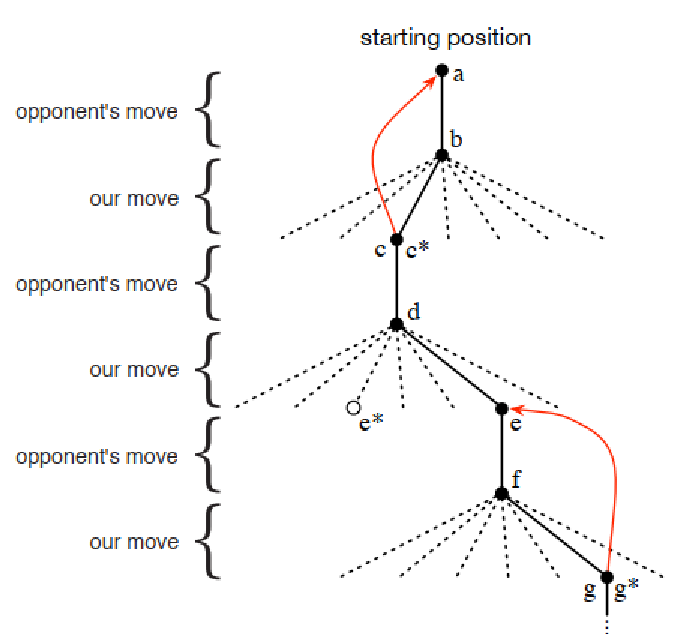

In [3]:
Image(r"images/RL_tic_tac_toe_figure.png", width=400, height=300)

### 1.5 Exercises

*Exercise 1.1: Self-Play: Suppose, instead of playing against a random opponent, the reinforcement learning algorithm described above played against itself, with both sides learning. What do you think would happen in this case? Would it learn a different policy for selecting moves?*

It would learn to play optimally (a different policy than playing against the suboptimal opponent), and would result in ties.

*Exercise 1.2: Symmetries: Many tic-tac-toe positions appear different but are really the same because of symmetries. How might we amend the learning process described above to take advantage of this? In what ways would this change improve the learning process? Now think again. Suppose the opponent did not take advantage of symmetries. In that case, should we? Is it true, then, that symmetrically equivalent positions should necessarily have the same value?*

If we knew a priori that there were symmetries and what these symmetries were, then when a move occurs from a state that results in a symmetry, it could update both its previous state and the state that would result in its symmetry, which would lead to more efficient learning. If the opponent did not recognize symmetries, then we shouldn't since symmetrical positions won't necessarily have equal value.

*Exercise 1.3: Greedy Play: Suppose the reinforcement learning player was greedy, that is, it always played the move that brought it to the position that it rated the best. Might it learn to play better, or worse, than a nongreedy player? What problems might occur?*

It might learn to play better or worse, depending on how simple the opponent's policy is: if the opponent makes the exact same moves every game, a greedy-always algorithm will play better, if it takes a more complicated strategy, a greedy-always algorithm will take longer to learn.

*Exercise 1.4: Learning from Exploration: Suppose learning updates occurred after all moves, including exploratory moves. If the step-size parameter is appropriately reduced over time (but not the tendency to explore), then the state values would converge to a di↵erent set of probabilities. What (conceptually) are the two sets of probabilities computed when we do, and when we do not, learn from exploratory moves? Assuming that we do continue to make exploratory moves, which set of probabilities might be better to learn? Which would result in more wins?*

Updating only after greedy moves: optimal agent; updating after all moves: suboptimal agent. After complete training (i.e. when $\alpha$ is reduced to 0), whatever the rate of exploration is, suboptimal agent would play suboptimally on this percentage of moves.

*Exercise 1.5: Other Improvements: Can you think of other ways to improve the reinforcement learning player? Can you think of any better way to solve the tic-tac-toe problem as posed?*

Add in a model of the opponent player that informs the policy of the agent.

## 1.7: Early History of RL

- RL has three main historical threads: learning by trial and error, solving optimal control problems via value functions and dynamic programming, and TD learning.
  - Optimal control thread:
    - In the 1950s, Richard Bellman took an approach to optimize (minimize or maximize) a dynamical system's behavior over time using: 1) the concept of the system's state and 2) a value function (aka "optimal return function") together to define the **Bellman equation**: solving for this equation yields the parameters necessary to optimize the system's behavior. The class of methods for solving the Bellman equation for a particular system came to be known as **dynamic programming**.
      - The Bellman equation suffers from the "curse of dimensionality", coined by Bellman himself.
    - This book considers all work in optimal control to be work in RL: "[an RL method is any that is an effective way of solving RL problems]"
    - The links between optimal control + dynamic control and learning were slow to develop, until Chris Watkins in 1989 using the MDP formalism in **Q-learning**.
    - Then in 1996 John Tsitsiklis coined the term "neurodynamic programming", combining dynamic programming with learning in artificial neural networks (ANNs).
  - Trial-and-error learning thread:
    - In 1911, Edward Thorndike expressed mammalian learning as "The Law of Effect", which describes the effect of reinforcing events on the tendency to select the actions preceding those events.
    - In 1927, Ivan Pavlov first used the term "reinforcement". 
    - The idea of implemening such trial-and-error learning in a computer appeared in 1948 by Turing, describing a "pleasure-pain system" in a computer for learning good/bad outcomes.
    - In 1954, Marvin Minsky discussed computational models of RL and described his construction of an analog machine that used what he called Stochastic Neural-Analog Reinforcement Calculators (SNARCs) meant to resemble modifiable biological neural synapses. (*note*: see cyberneticzoo.com)
    - Building analog electro-mechanical machines gave way to programming digital computers to do analagous behavior: Wesley Clark and Belmont Farley in 1954 described a digital simulation of a neural network that learned by trial-and-error, but they forayed more into supervised learning thereafter. 
      - This led to some researchers using the term "trial-and-error" to describe supervised learning: networks learning from training examples: "trial" in the sense of training batches, and "error" in the sense that the output of some error function is used to update connection weights. But this book argues that this "misses the essential character of trial-and-error learning as selecting actions on the basis of evaluative feedback that does not rely on knowledge of what the correct action should be".
    - In 1961 Minsky's "Steps Toward Artificial Intelligence" discussed several issues relevant to trial-and-error learning, including prediction, expectation, and the basic **credit-assignment problem**: how do you distribute credit appropriately amongst the many decisions that may have been involved in producing a reward? *All of the methods discussed in this book are directed towards solving this problem.*
    - In the 1970s-1990s John Andrae developed systems (e.g. STeLLA) that learned by trial-and-error, and later included a "leakback process" akin to updating by TD learning, but his work was not well-known and did not greatly impact subsequent RL.
    - In the early 1960s Donald Michie described a simple trial-and-error system for playing tic-tac-toe, called MENACE, which inspired an RL controlled called BOXES, which learned the now classical RL problem of balancing a pole hinged to a movable cart from only the "failure signal" of when the poll falls.
    - In the early 1970s, Bernard Widrow, Narendra Gupta and Sidhartha Maitra modified the Least-Mean-Square (LMS) algorithm to produce an RL agent that could learn from success and failure signals rather than training examples. They called this form of learning "selective boostrap adaptation" and described it as "learning with a critic", which inspired the terminology behind **actor-critic networks** used today (though for them a "critic" was an expert system able to do more than just evaluate performance).
    - Also in the 1960s and 1970s research on (stochastic) learning automata had a more direct influence on trial-and-error RL research: these sed to methods for solving nonassociative, purely selectional learning problems that came to be known as **bandit tasks**. 
      - Learning automata are simple, low-memory machines for improving the probability of reward. 
    - In 1974, E. Hearth and E. Tzanakou came up with the Alopex algorithm (foreshadowed by statistical learning theory as developed by William Estes, R. Bush, F. Mosteller, and others in the 50s and 60s) as a stochastic method for detecting correlations between actions and reinforcement, which influenced Sutton and Barto. 
    - Continuing in the 1970s, statistical learning theories were adopted by researchers in economics to study agents that act more like humans than optimal in economic decision-making scenarios. Game theory intersects these fields: a joint field is now known as neuroeconomics.
    - In the mid 1970s, John Holland outlined a general theory of adaptive systems based on selectional principles, culminating in classifier systems, true RL systems including association and value functions, utilizing the bucket-brigade algorithm (similar to TD learning) for credit-assignment, and a genetic algorithm to evolve useful representations.
    - Also in the mid 1970s through 80s, Harry Klopf revived trial-and-error RL applied to AI. Klopf sought AI agents that had "hedonic" aspects of behavior: "drives" to move relative to (away/towards) some ends (goals/aversions).
      - Klopf sought to emphasize the differences between RL and supervised learning.
      - Additional work showed how RL could produce learning algorithms for multilayer ANNs.
  - TD learning thread:
    - In 1959, Arthur Samuel was the first to propose an algorithm using TD, for playing checkers.
    - In the 1970s, Klopf was interest in large systems that had local reinforcement rules, where every subcomponent of a system can reinforce one another (e.g. neurons in a fully-connected neural network). In the 1980s, Sutton and Barto refined Klopf's ideas using to do this type of RL with TD learning.
    - Some neuroscience models developed in the 1980s and 90s by Eric Kandel, John Hopfield, Karl Friston, and others can be well interpreted in terms of TD learning, although there was little if any historical connection.
    - In the 1980s, Sutton and Barto formalized the actor-critic architecture for combining trial-and-error learning with TD learning, influenced by Ian Witten in the 1970s proposing a method that Sutton and Barto deemed **tabular TD(0)** for use as part of an adaptive controller for solving MDPs.
    - In 1988, Sutton separated TD learning from control, treating it as a general prediction method, and introduced the **TD($\lambda$)** algorithm.
    - In 1989, Chris Watkins tied TD and optimal control together with Q-learning (as mentioned in the "optimal control thread" section).
    - In 1992, Gerry Tesauro's backgammon playing program, TD-Gammon, brought additional attention to the field.
    - In the past couple decades, growing research has taken place in the intersection of RL and ML, and RL and neuro, particularly in RL in reward learning in the nervous system - commonly linked to dopaminergic systems.
    